# PART 1 : OUTLIERS

In [1]:
#Step 1 : Load the data on properties of cars into a pd dataframe
import pandas as pd 
import statsmodels.api as sm
cars = pd.read_csv("Downloads/accord_sedan.csv")
cars

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic
...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic
413,10995,69775,2006,ex,4 Cyl,Automatic
414,16000,77997,2006,exl,4 Cyl,Automatic
415,14700,61892,2006,ex,4 Cyl,Automatic


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4b9271100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4b92717c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4b9257d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4b9271e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4b927c220>],
 'means': []}

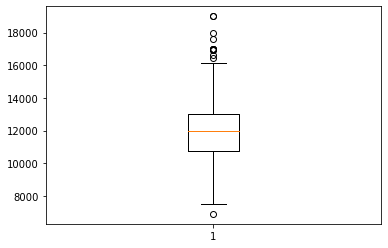

In [2]:
#Step 2: Plot suitable graphs to show the distributions and help indicate outliers of price and mileage (e.g. with boxplots) and their joint distribution (e.g. with a scatterplot)
import matplotlib.pyplot as plt 
#Step 3: (Visually) identify the outliers.
plt.boxplot(cars.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4b9363d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4b9372490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4b9363a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4b9372b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4b9372eb0>],
 'means': []}

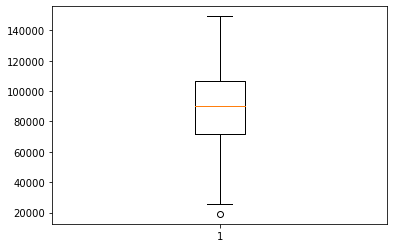

In [3]:
#Step 3:(Visually) identify the outliers.
plt.boxplot(cars.mileage)

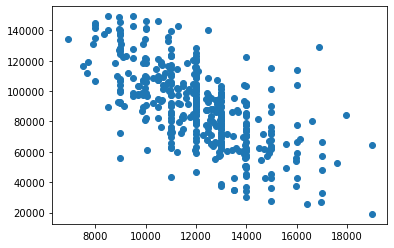

In [4]:
#step 2
plt.scatter(cars.price,cars.mileage)

In [5]:
#Step 4 Add two new columns to the dataframe called isOutlierPrice, isOutlierMileage. 
import pandas as pd
import numpy as np
sLength = len(cars["price"])
cars = cars.assign(isOutlierPrice = pd.Series(np.random.randn(sLength)).values)
sLength = len(cars["price"])
cars = cars.assign(isOutlierMileage = pd.Series(np.random.randn(sLength)).values)
cars

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMileage
0,14995,67697,2006,ex,4 Cyl,Manual,0.937757,1.174382
1,11988,73738,2006,ex,4 Cyl,Manual,1.329853,-0.093091
2,11999,80313,2006,lx,4 Cyl,Automatic,1.047921,1.826888
3,12995,86096,2006,lx,4 Cyl,Automatic,-0.132049,0.078815
4,11333,79607,2006,lx,4 Cyl,Automatic,-1.236799,-0.442409
...,...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0.307705,-1.286477
413,10995,69775,2006,ex,4 Cyl,Automatic,-0.381348,-0.189550
414,16000,77997,2006,exl,4 Cyl,Automatic,-0.423617,0.339577
415,14700,61892,2006,ex,4 Cyl,Automatic,0.331931,2.002132


In [6]:
#Step 4 For the price column, calculate the mean and standard deviation. 
cars_meanPrice = cars["price"].mean()
cars_meanPrice 

12084.242206235012

In [7]:
cars_stdPrice = cars["price"].std()
cars_stdPrice

2061.430033967955

In [8]:
Price_limitMAX = (2*cars_stdPrice + cars_meanPrice)
Price_limitMAX

16207.102274170922

In [9]:
Price_limitMIN = (- 2*cars_stdPrice + cars_meanPrice )
Price_limitMIN

7961.382138299103

In [10]:
mileage_limitMAX = 2*cars["mileage"].std() + cars["mileage"].mean()
mileage_limitMAX

141641.52391787665

In [11]:
mileage_limitMIN = -2*cars["mileage"].std() + cars["mileage"].mean()
mileage_limitMIN

37810.03483512097

In [15]:
#Step 4 Use the standard deviation and mean to try to identify outliers for these two variables and mark them with a 1 in the isOutlierPrice and isOutlierMilage columns
cars['isOutlierPrice'] = [1 if (x > Price_limitMAX) or (x< Price_limitMIN) else 0 for x in cars['price']]
cars['isOutlierMileage'] = [1 if (x > mileage_limitMAX) or (x< mileage_limitMIN) else 0 for x in cars['mileage']]

cars


,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMileage
0,14995,67697,2006,ex,4 Cyl,Manual,0,0
1,11988,73738,2006,ex,4 Cyl,Manual,0,0
2,11999,80313,2006,lx,4 Cyl,Automatic,0,0
3,12995,86096,2006,lx,4 Cyl,Automatic,0,0
4,11333,79607,2006,lx,4 Cyl,Automatic,0,0
...,...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0,0
413,10995,69775,2006,ex,4 Cyl,Automatic,0,0
414,16000,77997,2006,exl,4 Cyl,Automatic,0,0
415,14700,61892,2006,ex,4 Cyl,Automatic,0,0


<AxesSubplot:xlabel='price', ylabel='mileage'>

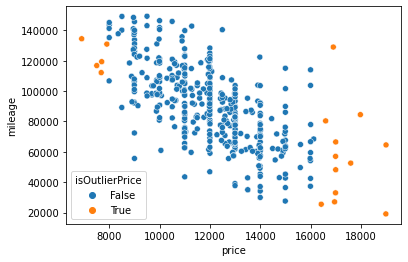

In [16]:
#Step 5 Show these "outliers" using a different colour (hue) in the plot. Are these what you would consider outliers? Observe whether they are the same as you would mark them.
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='price', y='mileage', data=cars,hue=(cars.isOutlierPrice==1) )

<AxesSubplot:xlabel='price', ylabel='mileage'>

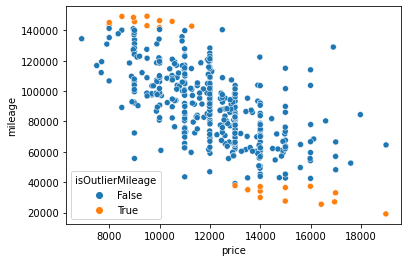

In [17]:
#Step 5 Show these "outliers" using a different colour (hue) in the plot. Are these what you would consider outliers? Observe whether they are the same as you would mark them.
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='price', y='mileage', data=cars,hue=(cars.isOutlierMileage==1) )

# PART 2 : Q - Q PLOTS 

In [18]:
#step 1: Download the csv data file from WHO on Tuberculosis (from Week01). Information on the data can be found on WHO's web page. You may need to replace missing values before you start.
import pandas as pd
import numpy as np 
TB = pd.read_csv('TB_burden_countries_2014-09-29.csv')
TB

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,Zimbabwe,ZW,ZWE,716,AFR,2008,12784041,445.0,56.0,1228.0,...,574.00,447.00,716.00,73000.0,57000.0,92000.0,Surveillance,40.0,32.0,51.0
4899,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,423.0,49.0,1192.0,...,531.00,408.00,670.00,68000.0,53000.0,86000.0,Surveillance,50.0,40.0,65.0
4900,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,438.0,70.0,1136.0,...,480.00,371.00,603.00,63000.0,48000.0,79000.0,Surveillance,53.0,43.0,69.0
4901,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,458.0,93.0,1107.0,...,433.00,335.00,543.00,58000.0,45000.0,73000.0,Surveillance,48.0,38.0,62.0


In [19]:
#step 1 
variable_interest = TB.e_prev_num_lo.replace(0,np.nan)
variable_interest

0       13000.0
1       22000.0
2       23000.0
3       28000.0
4       33000.0
         ...   
4898     7100.0
4899     6300.0
4900     9100.0
4901    12000.0
4902    13000.0
Name: e_prev_num_lo, Length: 4903, dtype: float64

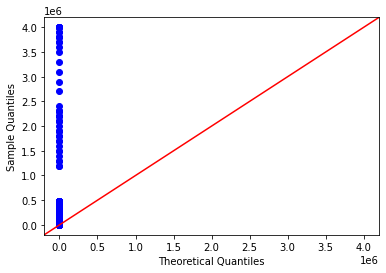

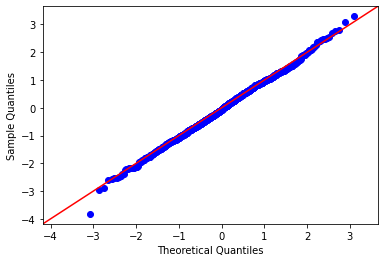

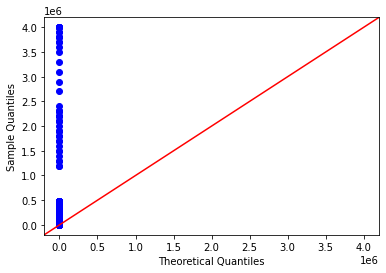

In [20]:
#step 2
import statsmodels.api as sm
normal_t = np.random.normal(0,1,1000)
sm.qqplot(normal_t,line='45')
sm.qqplot(variable_interest,line='45')

# Part 3: Distributions & Sampling & Robust Statistics

In [21]:
import numpy as np
normal_part3A = np.random.normal(5,1,5)
normal_part3B = np.random.normal(5,3,5)
normal_part3C = np.random.normal(5,0.5,5)

print(normal_part3A,normal_part3B,normal_part3C)

[5.49020286 8.87463951 5.21100164 6.24630533 5.32251196] [5.06187729 6.59920794 4.50069169 6.20616247 6.26859766] [4.93650478 4.43802742 4.85587216 5.54688235 5.19712439]


In [23]:
print("mean:",normal_part3A.mean(),normal_part3B.mean(),normal_part3C.mean())
print("Standard deviation:", normal_part3A.std(),normal_part3B.std(),normal_part3C.std())
from scipy.stats import skew
from scipy.stats import kurtosis
print("skewness:",skew(normal_part3A),skew(normal_part3B),skew(normal_part3C)) 
print("Kurtosis:",kurtosis(normal_part3A),kurtosis(normal_part3B),kurtosis(normal_part3C))

mean: 6.2289322609507485 5.727307410419681 4.994882221090025
Standard deviation: 1.3713912882377977 0.8037277175974913 0.36835445826837176
skewness: 1.2652571570474238 -0.46571479165349144 0.0036417724927998224
Kurtosis: -0.11382453556316907 -1.4776962901377815 -0.9244720118082497


In [27]:
normal_part3A = np.random.normal(5,1,10)
normal_part3B = np.random.normal(5,3,10)
normal_part3C = np.random.normal(5,0.5,10)

print(normal_part3A,normal_part3B,normal_part3C)


[4.91517634 4.22294735 3.42859254 3.43688262 6.06162492 3.5781955
 5.24692385 6.82920353 6.9024617  3.31166364] [3.91296515 8.03184489 2.67494344 7.69674191 7.69909703 3.0922395
 5.60285533 6.72455397 3.98657712 3.46730303] [5.43148614 4.85675963 5.07040569 5.4538615  4.86347429 4.93077254
 5.8185212  4.68389842 4.82824329 4.23858312]


In [30]:
print("mean:",normal_part3A.mean(),normal_part3B.mean(),normal_part3C.mean())
print("Standard deviation:", normal_part3A.std(),normal_part3B.std(),normal_part3C.std())
from scipy.stats import skew
from scipy.stats import kurtosis
print("skewness:",skew(normal_part3A),skew(normal_part3B),skew(normal_part3C)) 
print("Kurtosis:",kurtosis(normal_part3A),kurtosis(normal_part3B),kurtosis(normal_part3C))

mean: 4.793367199008808 5.288912136795252 5.01760058139899
Standard deviation: 1.34618218404063 1.99638955750459 0.4262783612975229
skewness: 0.39694391949456165 0.15418781026650613 0.18417051320490688
Kurtosis: -1.3692203228038724 -1.6423217772716951 -0.3944976231244879


In [31]:
normal_part3A = np.random.normal(5,1,100)
normal_part3B = np.random.normal(5,3,100)
normal_part3C = np.random.normal(5,0.5,100)

print(normal_part3A,normal_part3B,normal_part3C)



[4.67445506 4.34923529 8.01937345 3.26564312 3.66042844 3.49448593
 5.90187673 4.3735831  5.84511809 4.61663816 5.12633459 5.0691743
 4.65260028 4.89679824 5.46792208 5.80599556 5.01083902 3.94119273
 3.97825314 4.57420192 5.00663108 5.17165707 5.40443796 5.96199796
 6.27881217 4.57031596 5.34160285 5.59040342 4.35812211 3.0176171
 5.39158897 3.63596673 4.89065658 5.59098131 4.83437177 4.44919312
 4.38070925 5.34831145 3.65907264 4.19071196 4.79616013 3.6825204
 4.48954112 4.89961096 6.04251656 5.11541248 6.23952995 4.15939937
 5.95886344 5.46718365 5.49007998 6.35914622 4.53533318 5.17660323
 5.556886   3.94800112 3.24463753 5.30141238 4.88805583 6.02799217
 4.71550463 3.69039289 6.8401109  5.48112297 5.08300951 4.34731645
 6.15018526 4.94324438 4.53695279 5.42484479 5.91052112 5.6554278
 4.41859989 3.45241398 5.72405548 4.21621587 4.23104933 2.85412697
 4.50857598 4.28217175 3.87498749 5.2817299  6.15819422 3.50410841
 4.83398709 5.43008789 4.43342635 6.92350008 5.70392593 4.97797334

In [32]:
print("mean:",normal_part3A.mean(),normal_part3B.mean(),normal_part3C.mean())
print("Standard deviation:", normal_part3A.std(),normal_part3B.std(),normal_part3C.std())
from scipy.stats import skew
from scipy.stats import kurtosis
print("skewness:",skew(normal_part3A),skew(normal_part3B),skew(normal_part3C)) 
print("Kurtosis:",kurtosis(normal_part3A),kurtosis(normal_part3B),kurtosis(normal_part3C))

mean: 4.94820898055254 4.612208750424223 4.952356201862288
Standard deviation: 0.9438451718603592 3.021628702241778 0.4716508398015762
skewness: 0.22651850108147936 0.21456671111932737 0.21148318696202847
Kurtosis: 0.28707000618401324 -0.3583996762752881 -0.30624106121064987
